<style>
    h1{ font-family:"Times New Roman",serif;
        color:white;
        background-color:#1a64a0;
        text-align:center;
        text-shadow:2px 2px 0px darkorange, 0 0 5px silver;
        border: #ffa000 solid 5px;
        height:1.5em;
    }
    h2{ font-weight: ;
    }
</style>
<h1> Physics and Technology of Inertial Fusion Energy </h1>

<h><i> Notebook developed by Federico Avella and Luca Labate</i> <h>

 <h2> <b>Pre-preliminary: a very very very very... fast Python crash course </b></h2>

In [62]:
def color_txt(txt:str,r=128,g=128,b=128):
    string = f"\033[38;2;{r};{g};{b}m{txt}\033[00m"
    return string

print('TYPES')
print({1:type(1),1e-5:type(1e-5),'1':type('1'),0+1j:type(0+1j)})

print("\nSTRUCTURED TYPES\n")
aTuple = tuple((0,'0',0+1j)); bTuple = (0,'0',0+1j)
print('-Tuples\n',aTuple,bTuple,color_txt('FINITE, ORDERED, IMMUTABLE',255,10,10),sep='\t',end='\t|O_O|\n')

aList = list()
for i in range(len(aTuple)+1):
    aList.append([i,str(i)])
bList = [[i,str(i)] for i in range(len(bTuple))]
print('-Lists\n',aList,bList,color_txt('ORDERED, MUTABLE',255,255,0),sep='   ',end='\tU_U\n\n')
print(f"     Accessing elements of a list/tuple\n\tslicing:{aList[0:2]}, single element:{aList[3]}\n")

aDict = dict(aList)
bDict = {}
for v,k in aList:
    if v<2:
        bDict[k] = v
    else:
        bDict[k] = 'Hello World!'
cDict = {0:'0','1':1,2**.5*(1+1j):2.0}
print('-Dictionaries\n',aDict,bDict,cDict,sep='  ')
print(color_txt('key-value PAIR, ORDERED, MUTABLE',0,255,0),end='\t^_^\n')

TYPES
{1: <class 'int'>, 1e-05: <class 'float'>, '1': <class 'str'>, 1j: <class 'complex'>}

STRUCTURED TYPES

-Tuples
	(0, '0', 1j)	(0, '0', 1j)	FINITE, ORDERED, IMMUTABLE	|O_O|
-Lists
   [[0, '0'], [1, '1'], [2, '2'], [3, '3']]   [[0, '0'], [1, '1'], [2, '2']]   ORDERED, MUTABLE	U_U

     Accessing elements of a list/tuple
	slicing:[[0, '0'], [1, '1']], single element:[3, '3']

-Dictionaries
  {0: '0', 1: '1', 2: '2', 3: '3'}  {'0': 0, '1': 1, '2': 'Hello World!', '3': 'Hello World!'}  {0: '0', '1': 1, (1.4142135623730951+1.4142135623730951j): 2.0}
key-value PAIR, ORDERED, MUTABLE	^_^


In [ ]:
import numpy as np
anArray = np.array(aList)
print(color_txt(f'A very important, not-built-in , structured type: {type(anArray)}',255,128,64))
print(anArray)
print(f'column:{anArray[:,0]}(0-axis), row:{anArray[0,:]}(1-axis), element:{anArray[2,1]}')

 <h2> <b>Preliminary: Image Pre-processing </b></h2>

In [1]:
#%% Import relevant modules
import importlib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

from importnb import imports

In [ ]:
#%% Import the AuxiliaryClass
with imports("ipynb"):
    import AuxiliaryTools as at
    importlib.reload(at) 
import os
ac = at.AuxiliaryClass()
mm = 1e-3

>>	AuxiliaryClass successfully created


<h2> Input parameters </h2>
<ul>
    <li> <strong>Nimages</strong>: number of input images (corresponding to the number of positions where the images were taken </li>
    <li> <strong>pixelsizex, pixelsizey</strong>: size of the pixel of the original images along x and y</li>
    <li> <strong>resampligFactor</strong>: for the sake of keeping the size (in memory) of each image at a reasonable level, a sampling of the original image(s) to reduce the number of pixels might be needed. This factor corresponds to the fraction of pixels (along each direction) which are kept. For instance, a resamplingFactor=0.5 corresponds to 1 out of 2 pixels being kept (and 1 every other pixel being dropped)</li>
    <li> <strong>finalImageNpixelsx, finalImageNpixelsy</strong>: number of pixels in the final images, that is, the images obtained after the resampling and the centering of the images to each other (using the center of mass as a reference)</li>
    <li> <strong>InputDIR, imagesFNs</strong>: input directory, list of the images names</li>
</ul>

<h2><li> Set the input parameters (dir names, file names, etc.) and the output parameters</li></h2>

In [ ]:
if 'InputDIR' not in locals():
    InputDIR = "./imgs_folder/te_222_micros_nf/"
    
nome_cartella = os.path.basename(InputDIR)
imagesFNs = glob.glob("*.tiff",root_dir=InputDIR)
imagesFNs.sort()

pixelsizex = 0.0056*mm # in mm
pixelsizey = 0.0056*mm # in mm
resamplingFactor = float(input("Enter the resampling factor (e.g., 0.5 for half size): "))


NameError: name 'os' is not defined

<h2><li>  Retrieve internal params and allocate objects </li></h2> 

In [4]:
ac.setImagesDir(InputDIR)
ac.setImagesFilenames(*imagesFNs)

resampledpixelsizex = pixelsizex / resamplingFactor
resampledpixelsizey = pixelsizey / resamplingFactor

>>	OK! Directory exists
>>	OK, file 225mm.tif exists
>>	OK, file 275mm.tif exists
>>	OK, file 325mm.tif exists
>>	OK, file 375mm.tif exists
>>	OK, file 425mm.tif exists


<h2><li> Allocate an ImageClass for each image and then load the image </li></h2>
<h3>Show the original image</h3>
<par><strong>WARNING</strong>: on executing the following cell, you should close each of the images you will be shown with by typing 'q'.<br>
Closing the image using the mouse might result in the notebook getting frozen</par>

In [5]:
inputImages = [at.ImageClass() for i in ac.imagesPath]
for i,img in enumerate(inputImages):
    img.loadImage(ac.imagesPath[i],{'x':pixelsizex,'y':pixelsizey})
for img in inputImages:
    img.showOriginal()

<h3>Select the color channel of interest</h3>

In [6]:
#%% Select the red (or other) channel
channel = str(input("Select a channel among 'red','green','blue'")).capitalize()[0]
for i in range(len(inputImages)):
    inputImages[i].selectChannel(channel)

<h2><li> Resample the original image </li></h2>
<par><strong>WARNING</strong>: again, as before!</par>

In [7]:
for img in inputImages:
    img.resampleOriginal(factor=resamplingFactor)
    img.showOriginal()
    print(img.imageData.max())


<h2><li> Select Region Of Interest and BackGround for each istance in inputImages </li></h2>
<par> The next series of methods in the <code>for</code>-loop will allow you to select a ROI and a BG for each image. The <code>.retrieveAverageBG</code> and <code>.subtractBGfromROI</code> methods will calculate a mean BG value to be subtracted from the ROI pixel values. Eventually, all the negative pixel values after this operation will be clipped at 0.

<par><strong>WARNING 1</strong>: for each image you will select ROI and BG in sequence. Look at window name ;)<br>
<strong>WARNING 2</strong>: in order to select the ROI/BG of each image</par>
<ol>
 <li> Use the mouse to select the ROI by holding the left button pressed</li>
 <li> Press the spacebar with the button still pressed</li>
 <li>close the image by pressing 'q'</li>
</ol>

In [9]:
for img in inputImages:
    img.selectROI()
    img.selectBG()
# Subtract a background from the ROI
    img.retrieveAverageBG()
    img.subtractBGfromROI()

### You can resample back the ROI image 

In [10]:
#%% Show the background-corrected ROIs
ROIresampling = input("Would you like to resample back the ROI? (y/n)").capitalize()[0]
resROIfactor = 1/resamplingFactor
for img in inputImages:
    if ROIresampling == 'Y':
        img.resampleROI(factor=resROIfactor)
    else:
        pass

<h4>Check the BG level after subtraction</h4> 

In [11]:
for img in inputImages:
    winName = f"Check {img.imageName} ROI background"
    cv2.namedWindow(winName, cv2.WINDOW_NORMAL)
    ROIedges = cv2.selectROI(winName, img.ROI, True, False)
    tmp = img.ROI[ROIedges[1]:ROIedges[1]+ROIedges[3], ROIedges[0]:ROIedges[0]+ROIedges[2]]
    tmp_avr_bg = np.mean(tmp)
# Subtract a background from the ROI
    print(img.imageName+' BG value after correction: '+str(tmp_avr_bg))
    cv2.destroyWindow(winName)


<style>
    code{color:white}
</style>
<h2><li> Create the final, centered images </li></h2>
<p><strong>finalImageNpixelsx, finalImageNpixelsy</strong>: number of pixels in the final images, that is, the images obtained after the resampling and the centering of the images to each other (using the center of mass as a reference)</p>
<h3> <strong>WARNING</strong>: the number of pixels in both axis-directions (y:0,x:1) must be higher than the ROI shape </h3>
<p> The method <code>.buildImageWithSize()</code> extends the images along both axis up to the provided number of pixels, adding 0-value padding.</p>
<p> Then it centers the image according to <code>.getCenterOfMassOfROI()</code></p>


In [12]:
#%% Set the pixel dimensions of the final images
finalImageNpixelsx = int(input("Enter the number of pixels in x direction for the final image: "))
finalImageNpixelsy = int(input("Enter the number of pixels in y direction for the final image: "))
xMin = resampledpixelsizex/2.0
xMax = resampledpixelsizex * (finalImageNpixelsx - 0.5)
yMin = resampledpixelsizey/2.0
yMax = resampledpixelsizey * (finalImageNpixelsy - 0.5)


xCoord = np.linspace(xMin, xMax, finalImageNpixelsx)
yCoord = np.linspace(yMin, yMax, finalImageNpixelsy)

xExtent = resampledpixelsizex/2.0 + np.max(xCoord)
yExtent = resampledpixelsizey/2.0 + np.max(yCoord)

print("Final image actual size: {:f}, {:f}".format(xExtent, yExtent))
#%% Retrieve the center of mass
for img in inputImages:
    img.getCenterOfMassOfROI()
    img.buildImageWithSize(finalImageNpixelsx,finalImageNpixelsy)
    img.showCenteredROI()


Final image actual size: 0.008400, 0.008400


<h>Show the final images as density maps with matplotlib</h>

In [13]:
Nimages=len(inputImages)
fig, ax = plt.subplots(1, Nimages, figsize=(12,4*Nimages))
for i in range(Nimages):
    Ny,Nx = inputImages[i].ysize,inputImages[i].xsize
    yMax = (Ny+.5)*inputImages[i].roiCalibration['y']
    xMax = (Nx+.5)*inputImages[i].roiCalibration['x']
    img=ax[i].imshow(inputImages[i].centeredROI,
              extent=np.array([0, xMax, 0, yMax])*1e3,
              cmap='RdBu_r',
              aspect='equal',
              vmin=0,
              vmax=inputImages[i].centeredROI.max())
    ax[i].set_xlabel('x [mm]')
    ax[i].set_ylabel('y [mm]')
    ax[i].set_title(inputImages[i].imageName)
    plt.colorbar(img,shrink=.3)
    print(inputImages[i].imageName,
          'shape: '+str(inputImages[i].centeredROI.shape),
          'calibration: '+str(inputImages[i].roiCalibration),
          "xMax = {:.2f}, yMax = {:.2f}".format(xMax,yMax),
          sep="\n\t-",
          end="\n")
fig.tight_layout()

ValueError: Number of columns must be a positive integer, not 0

<Figure size 1200x0 with 0 Axes>

<h2>Demonstration of other auxiliary functions <h2>

<h3>Enhancing contrast <h3>

In [ ]:
ShowAuxFunctions = input("Do you want to show the auxiliary functions? (y/n) ").lower()
if ShowAuxFunctions[0]=='y':
    immagine = inputImages[0].enhanceContrast(inputImages[0].ROI,2)
    cv2.namedWindow("fig2", cv2.WINDOW_NORMAL)
    cv2.namedWindow("fig3", cv2.WINDOW_NORMAL)
    cv2.imshow("fig2", inputImages[0].ROI)
    cv2.imshow("fig3", immagine)
    cv2.waitKey(0)
    cv2.destroyWindow("fig2")
    cv2.destroyWindow("fig3")

<h3> Rescaling Max/Min values <h3>

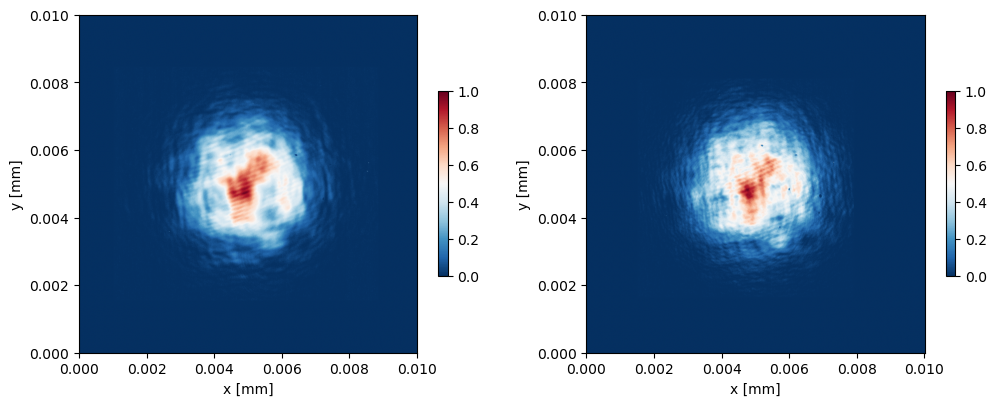

In [ ]:
if ShowAuxFunctions[0]=='y':
    fig, ax = plt.subplots(1, Nimages, figsize=(12,4*Nimages))
    
    for i in range(Nimages):
        img=inputImages[i]
        Ny,Nx = inputImages[i].ysize,inputImages[i].xsize
        yMax = (Ny+1)*inputImages[i].roiCalibration['y']
        xMax = (Nx+1)*inputImages[i].roiCalibration['x']
        image=ax[i].imshow(img.rescale2minmax(img.centeredROI,0,1),
                  extent=[0, xMax, 0, yMax],cmap='RdBu_r',aspect='equal')
        ax[i].set_xlabel('x [mm]')
        ax[i].set_ylabel('y [mm]')
        plt.colorbar(image,shrink=.3)
    